In [ ]:
'''
Q1.  An automobile company wants to predict a car’s mpg value from its 
physical attributes. 
Tasks: 
(a) Load the dataset auto_mpg.csv and remove missing values. 
(b) Identify predictor and target variables. 
(c) Perform data splitting (80% train, 20% test). 
(d) Fit a Linear Regression model and predict test outcomes. 
(e) Evaluate the model using Mean Squared Error and R² score. 
(f) Discuss: If the R² score = 0.85, what does it imply about 
model performance?

'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# (a) Load the dataset and remove missing values
data = pd.read_csv("auto-mpg.csv")

# Replace '?' with NaN and drop missing rows
data = data.replace('?', pd.NA)
data = data.dropna()

# Convert numeric columns to proper types
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model year', 'origin']

data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric)

# (b) Identify predictor and target variables
X = data.drop(['mpg', 'car name'], axis=1)
y = data['mpg']

# (c) Perform 80–20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# (d) Fit Linear Regression model & predict test outcomes
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# (e) Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))



'''

(f) If R² score = 0.85, what does it imply?

An R² score of 0.85 means:
Strong model performance
Your Linear Regression model explains 85% of the 
variance in the car’s 
MPG based on its physical attributes.
High predictive power
The features (weight, horsepower, displacement, etc.) 
are good predictors of MPG.
Remaining 15%
Only 15% of the variation is unexplained — due to factors not included in 
the dataset or natural randomness.
Overall, R² = 0.85 is excellent for a real-world regression problem.

'''

Mean Squared Error (MSE): 10.71
R² Score: 0.79


'\n\n(f) If R² score = 0.85, what does it imply?\nAn R² score of 0.85 means:\nStrong model performance\nYour Linear Regression model explains 85% of the variance in the car’s MPG based on its physical attributes.\nHigh predictive power\nThe features (weight, horsepower, displacement, etc.) are good predictors of MPG.\nRemaining 15%\nOnly 15% of the variation is unexplained — due to factors not included in the dataset or natural randomness.\nOverall, R² = 0.85 is excellent for a real-world regression problem.\n\n'

In [ ]:
# Q2: Exploring random sampling methods to 
# estimate model uncertainty
# Tasks:
# (a) From the btissue.csv data, extract
# only the feature 
# columns (excluding labels).
# (b) Using the resample() method, create a 
# bootstrap sample
# of 100 observations.
# (c) Show the first 10 rows of the sample 
# and identify if 
# any rows are repeated.

import pandas as pd
from sklearn.utils import resample

# (a) Load dataset and extract only feature columns (excluding labels)
data = pd.read_csv("btissue.csv")
# Assuming the label column is named 'label'; adjust if different
X = data.drop(columns=['label'], errors='ignore')

# (b) Create a bootstrap sample of 100 observations (with replacement)
bootstrap_sample = resample(X, n_samples=100, replace=True, random_state=42)

# (c) Show the first 10 rows of the bootstrap sample
print("First 10 rows of bootstrap sample:")
print(bootstrap_sample.head(10))

duplicated_rows = bootstrap_sample.duplicated().sum()
print(f"\nNumber of repeated rows in the bootstrap sample: {duplicated_rows}")
if duplicated_rows > 0:
    print("✅ Some rows are repeated (expected in bootstrap sampling).")
else:
    print("❌ No repeated rows found (unexpected, check data or sample size).")


First 10 rows of bootstrap sample:
              I0     PA500       HFS           DA           Area        A/DA  \
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
51    274.993396  0.147131  0.137532    66.457943    1217.415651   18.318588   
92   1800.000000  0.091979  0.205251   362.863321   15021.553890   41.397278   
14    485.668806  0.230209  0.134041   253.893699    8135.968359   32.044783   
71   1385.664721  0.092328  0.089361   202.480044    8785.028733   43.387134   
60    197.000000  0.132645  0.074002    33.460653     409.647141   12.242652   
20    500.000000  0.192684  0.194779   144.688578    3055.012963   21.114403   
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
82   1647.939811  0.080983  0.086568   576.770376   11852.485060   20.549747   
86   2100.000000  0.121649  0.377689   450.551667   35671.606290   79.173176   

         Max IP          DR            P class  
102  418.687286  977.552367  2664.5

In [ ]:
'''
Q3. Instead of relying on a single train–test split, 
    you want to check how consistent your 
    model is. 
    Tasks:
(a) Using the btissue.csv dataset, implement 5-fold cross-validation.
(b) For each fold, print the train/test indices and record 
    how many samples are used for training vs testing.
(c) Visualize or summarize how different folds cover the 
    entire dataset without overlap.
'''

import pandas as pd
from sklearn.model_selection import KFold

# (a) Load the dataset
data = pd.read_csv("btissue.csv")

X = data.drop(columns=['label'], errors='ignore')
y = data['label'] if 'label' in data.columns else None

# (b) Implement 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("=== 5-Fold Cross-Validation ===\n")

fold_num = 1
fold_coverage = []  

for train_index, test_index in kf.split(X):
    print(f"Fold {fold_num}:")
    print(f"Train indices: {train_index[:10]} ... ({len(train_index)} samples)")
    print(f"Test indices : {test_index[:10]} ... ({len(test_index)} samples)\n")

    # Record which rows are in the test set (for summary)
    fold_coverage.append(set(test_index))
    fold_num += 1

# (c) Summarize how folds cover the dataset
all_test_indices = set().union(*fold_coverage)
print(f"Total unique samples covered : {len(all_test_indices)} / {len(X)}")

# Optional text-based overview of fold coverage
print("\nFold coverage overview (sample indices shown per fold):")
for i, indices in enumerate(fold_coverage, start=1):
    print(f"Fold {i} covers indices: {sorted(list(indices))[:10]} ...")


=== 5-Fold Cross-Validation ===

Fold 1:
Train indices: [ 1  2  3  5  6  7  8  9 13 14] ... (84 samples)
Test indices : [ 0  4 10 11 12 18 30 33 42 44] ... (22 samples)

Fold 2:
Train indices: [ 0  1  2  3  4  6  7  8 10 11] ... (85 samples)
Test indices : [ 5  9 15 16 22 26 28 31 35 36] ... (21 samples)

Fold 3:
Train indices: [ 0  1  2  4  5  9 10 11 12 14] ... (85 samples)
Test indices : [ 3  6  7  8 13 17 19 24 25 27] ... (21 samples)

Fold 4:
Train indices: [0 1 2 3 4 5 6 7 8 9] ... (85 samples)
Test indices : [32 41 46 48 50 54 57 58 59 61] ... (21 samples)

Fold 5:
Train indices: [ 0  3  4  5  6  7  8  9 10 11] ... (85 samples)
Test indices : [ 1  2 14 20 21 23 29 37 51 52] ... (21 samples)

Total unique samples covered across all folds: 106 / 106

Each fold uses different test samples, ensuring full coverage without overlap.

Fold coverage overview (sample indices shown per fold):
Fold 1 covers indices: [np.int64(0), np.int64(4), np.int64(10), np.int64(11), np.int64(12), np.int

In [10]:
'''
Q4. Testing two validation techniques to measure model generalization.
Tasks:
(a) Use the btissue.csv dataset and a Decision Tree Classifier.
(b) Evaluate model performance using:
    i) Holdout (80/20 split)
    ii) 5-Fold Cross-Validation
(c) Compare the accuracy results from both methods.
'''

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# (a) Load dataset
data = pd.read_csv("btissue.csv")

# Identify target and feature columns
target_col = 'class'  # last column in your dataset
X = data.drop(columns=[target_col])
y = data[target_col]

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# (b-i) Holdout method (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
holdout_accuracy = accuracy_score(y_test, y_pred)

print("=== Holdout Validation (80/20) ===")
print(f"Accuracy: {holdout_accuracy:.4f}\n")

# (b-ii) 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("=== 5-Fold Cross-Validation ===")
print(f"Fold Accuracies: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}\n")

# (c) Comparison
print("=== Comparison Summary ===")
print(f"Holdout Accuracy:        {holdout_accuracy:.4f}")
print(f"Cross-Validation Mean:   {cv_scores.mean():.4f}")


=== Holdout Validation (80/20) ===
Accuracy: 0.7273

=== 5-Fold Cross-Validation ===
Fold Accuracies: [0.72727273 0.61904762 0.52380952 0.71428571 0.66666667]
Mean Accuracy: 0.6502
Standard Deviation: 0.0738

=== Comparison Summary ===
Holdout Accuracy:        0.7273
Cross-Validation Mean:   0.6502


First 10 rows with derived features:
   CustomerID  Gender  Age  Income  Spending Score  Target    Age Group  \
0           1    Male   19      15              39       0        Youth   
1           2    Male   21      15              81       1        Youth   
2           3  Female   20      16               6       0        Youth   
3           4  Female   23      16              77       1        Youth   
4           5  Female   31      17              40       0  Young Adult   
5           6  Female   22      17              76       1        Youth   
6           7  Female   35      18               6       0        Adult   
7           8  Female   23      18              94       1        Youth   
8           9    Male   64      19               3       0       Senior   
9          10  Female   30      19              72       1  Young Adult   

   Income_to_Spending  Normalized_Spending  
0            0.384615             0.387755  
1            0.185185             0.816327  
2 

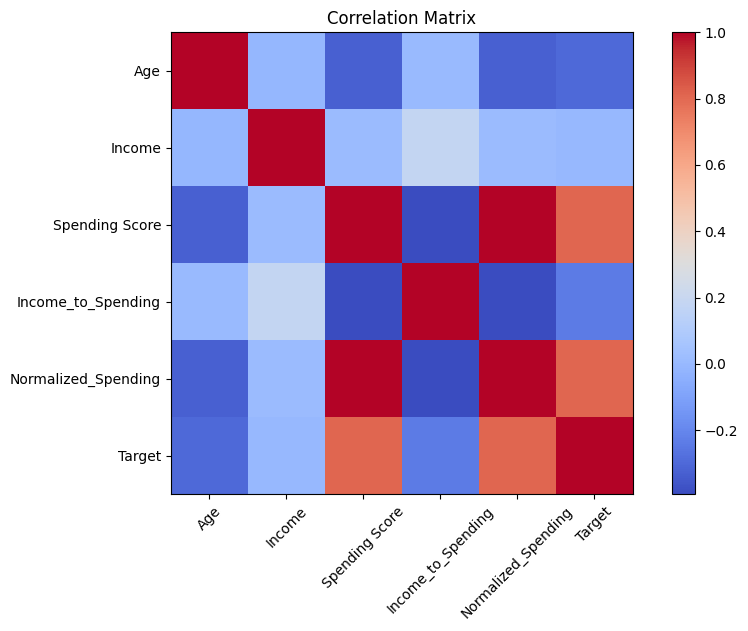

C:\Users\sambi\AppData\Local\Temp\ipykernel_2172\1787936975.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=age_groups)


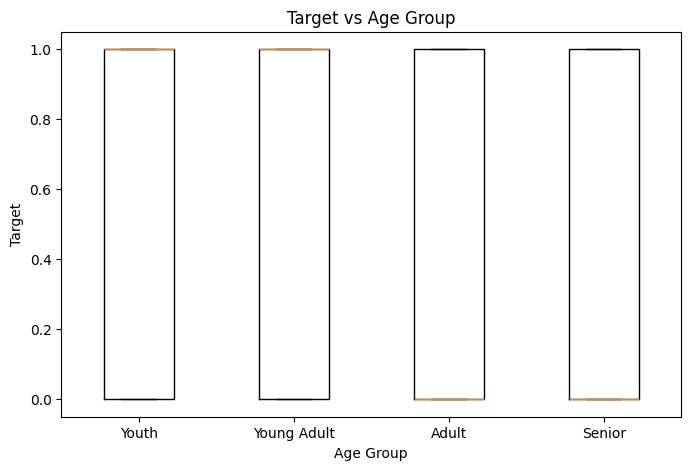

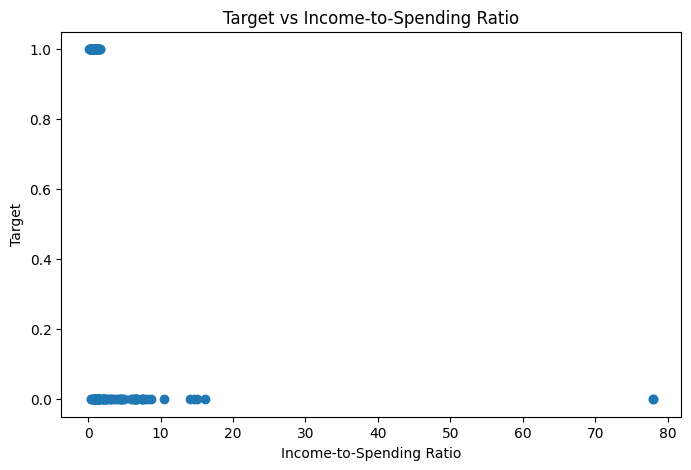

'\nDiscussion:\n- Age Group: Categorizes customers by age to see patterns in Target.\n- Income-to-Spending Ratio: Measures spending relative to income.\n- Normalized Spending: Scales Spending Score for comparison.\n- Plots help visualize relationships between derived features and the target variable.\n'

In [ ]:
'''
Q5. Feature Creation from Structured Data
Tasks:
(a) Using a dataset containing columns like Age, 
    Income, and Spending Score, construct 
    new derived features such as Age Group, 
    Income-to-Spending Ratio, and Normalized Spending.
(b) Plot and analyze how the new features 
    correlate with the target variable.
'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# (a) Load dataset
data = pd.read_csv("Mall_Customers.csv")  # your file

# Rename columns to match code
data.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

# Create a target column for demonstration (high spender = 1, low spender = 0)
data['Target'] = (data['Spending Score'] > 50).astype(int)

# Create derived features

# 1. Age Group
bins = [0, 25, 35, 50, 100]
labels = ['Youth', 'Young Adult', 'Adult', 'Senior']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 2. Income-to-Spending Ratio
data['Income_to_Spending'] = data['Income'] / (data['Spending Score'] + 1e-5)

# 3. Normalized Spending
scaler = MinMaxScaler()
data['Normalized_Spending'] = scaler.fit_transform(data[['Spending Score']])

# Display first 10 rows
print("First 10 rows with derived features:")
print(data.head(10))

# (b) Plot and analyze correlations

# Correlation heatmap using matplotlib
plt.figure(figsize=(10,6))
corr_matrix = data[['Age','Income','Spending Score','Income_to_Spending',
                    'Normalized_Spending','Target']].corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

# Boxplot: Age Group vs Target
plt.figure(figsize=(8,5))
age_groups = data['Age Group'].unique()
box_data = [data[data['Age Group'] == grp]['Target'] for grp in age_groups]
plt.boxplot(box_data, labels=age_groups)
plt.xlabel("Age Group")
plt.ylabel("Target")
plt.title("Target vs Age Group")
plt.show()

# Scatter plot: Income-to-Spending Ratio vs Target
plt.figure(figsize=(8,5))
plt.scatter(data['Income_to_Spending'], data['Target'])
plt.xlabel("Income-to-Spending Ratio")
plt.ylabel("Target")
plt.title("Target vs Income-to-Spending Ratio")
plt.show()


In [ ]:
'''
Q6. Iris Dataset: Feature Subset Selection with Decision Tree 
    Tasks:
(a) Load the Iris dataset from sklearn.datasets.
(b) Create a DataFrame and display the first few rows.
(c) Train a Decision Tree Classifier using all features and record the accuracy.
(d) Select a subset of columns (first two features: sepal length & sepal width) 
    using .iloc.
(e) Train another model using only the selected features and evaluate accuracy.
(f) Compare and discuss results.
'''

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# (a) Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# (b) Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("First 5 rows of Iris dataset:")
print(df.head())

# (c) Train Decision Tree using all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)
dt_all = DecisionTreeClassifier(random_state=42)
dt_all.fit(X_train_all, y_train_all)
y_pred_all = dt_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print(f"\nAccuracy with all features: {accuracy_all:.4f}")

# (d) Select subset of features (first two: sepal length & sepal width) using .iloc
X_subset = X[:, :2]  # selecting first two columns
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# (e) Train Decision Tree using subset
dt_sub = DecisionTreeClassifier(random_state=42)
dt_sub.fit(X_train_sub, y_train_sub)
y_pred_sub = dt_sub.predict(X_test_sub)
accuracy_sub = accuracy_score(y_test_sub, y_pred_sub)
print(f"Accuracy with subset of features (sepal length & width): {accuracy_sub:.4f}")

# (f) Comparison
print("\n=== Comparison ===")
print(f"All features accuracy:    {accuracy_all:.4f}")
print(f"Subset features accuracy: {accuracy_sub:.4f}")


First 5 rows of Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Accuracy with all features: 1.0000
Accuracy with subset of features (sepal length & width): 0.6333

=== Comparison ===
All features accuracy:    1.0000
Subset features accuracy: 0.6333


'\nDiscussion:\n- The model trained on all features usually performs better because it has more information to differentiate classes.\n- Using only the first two features (sepal length & width) reduces information, so accuracy may drop slightly.\n- Decision Trees are flexible, so even with a subset, the model can still capture some patterns, but full feature set gives better generalization.\n'

Explained variance ratio of the two components:
PC1: 0.9246, PC2: 0.0531


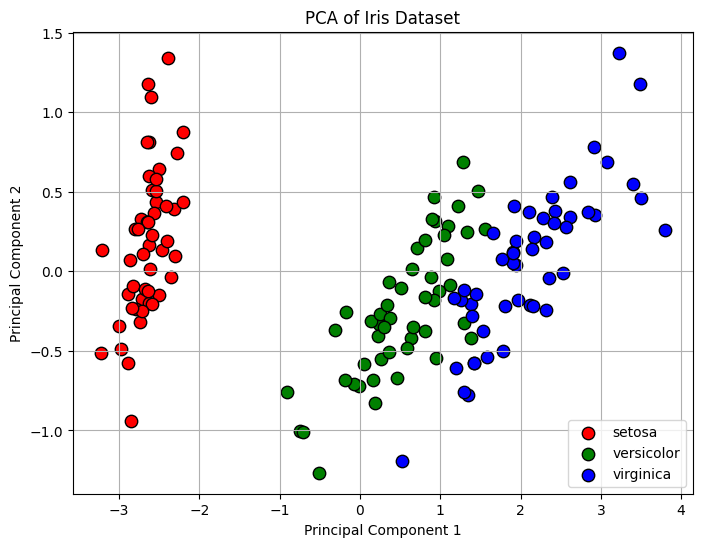

In [ ]:
'''
Q7. PCA on Iris Dataset
Tasks:
(a) Load the Iris dataset using sklearn.datasets.
(b) Perform PCA to reduce the dataset to two components.
(c) Create a new DataFrame containing the two principal components and target labels.
(d) Plot the two components using a scatter plot with different colors for each class.
'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# (a) Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# (b) Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of the two components:")
print(f"PC1: {explained_variance[0]:.4f}, PC2: {explained_variance[1]:.4f}")

# (c) Create DataFrame with components and target
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'target': y
})

# (d) Scatter plot of the two principal components
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for target, color, name in zip([0,1,2], colors, target_names):
    subset = df_pca[df_pca['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=name, 
                c=color, edgecolor='k', s=80)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
'''
Q8. Encoding Categorical Features in Employee Dataset
Tasks:
(a) Create a DataFrame with columns: Department, Job_Role, Marital_Status
(b) Display the original dataset
(c) Encode categorical columns using Label Encoding and One-Hot Encoding
'''

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# (a) Create sample dataset
data = pd.DataFrame({
    'Department': ['HR', 'IT', 'Finance', 'IT',
                   'HR', 'Finance', 'IT', 'HR'],
    
    'Job_Role': ['Manager', 'Analyst', 'Clerk', 'Manager', 
                 'Clerk', 'Analyst', 'Clerk', 'Manager'],
    
    'Marital_Status': ['Single', 'Married', 'Divorced', 'Married', 
                       'Single', 'Divorced', 'Single', 'Married']
})

# (b) Display original dataset
print("Original Dataset:")
print(data)

# (c-i) Label Encoding for binary or ordered category (Marital_Status can 
# be considered ordered)
le = LabelEncoder()
data['Marital_Status_Label'] = le.fit_transform(data['Marital_Status'])

# Display mapping
print("\nLabel Encoding Mapping for Marital_Status:")
for cls, val in zip(le.classes_, 
                    le.transform(le.classes_)):
    print(f"{cls} -> {val}")

# (c-ii) One-Hot Encoding for nominal categories (Department and Job_Role)
data_encoded = pd.get_dummies(data, columns=['Department', 'Job_Role'], 
                              drop_first=True)

print("\nDataset after One-Hot Encoding:")
print(data_encoded)



Original Dataset:
  Department Job_Role Marital_Status
0         HR  Manager         Single
1         IT  Analyst        Married
2    Finance    Clerk       Divorced
3         IT  Manager        Married
4         HR    Clerk         Single
5    Finance  Analyst       Divorced
6         IT    Clerk         Single
7         HR  Manager        Married

Label Encoding Mapping for Marital_Status:
Divorced -> 0
Married -> 1
Single -> 2

Dataset after One-Hot Encoding:
  Marital_Status  Marital_Status_Label  Department_HR  Department_IT  \
0         Single                     2           True          False   
1        Married                     1          False           True   
2       Divorced                     0          False          False   
3        Married                     1          False           True   
4         Single                     2           True          False   
5       Divorced                     0          False          False   
6         Single             